# Social Graphs Final Project

For this project, our goal is to take the top 150 most popular movies of all times on IMDB, and analyse the connection between the main actors starring in them. We want to get an insight into the dynamics of relationships and collaborations among actors in the film industry. For example, we might discover key actors who have repeatedly worked together, which would indicate successful collaborations.

## Creating the network

WE NEED THE CODE FOR MOVIES CAST NEW FILE HERE

ALSO NEED TO EXPLAIN THIS FOLLOWING CODE A BIT MORE WITH COMMENTS

{'Nicholas Rowe': ['Lock, Stock and Two Smoking Barrels'], 'Klaus Wennemann': ['Das Boot'], 'Perry Lopez': ['Chinatown'], 'Noel Appleby': ['The Lord of the Rings: The Return of the King', 'The Lord of the Rings: The Fellowship of the Ring'], 'Al Lettieri': ['The Godfather'], 'Martin Stringer': ['There Will Be Blood'], 'Chiaki Kuriyama': ['Kill Bill: Vol. 1'], 'Bruce Norris': ['The Sixth Sense'], 'Alec Baldwin': ['The Departed'], 'Linda Cardellini': ['Avengers: Endgame', 'Green Book'], 'Seu Jorge': ['City of God'], 'Marcus Chong': ['The Matrix'], 'William Alland': ['Citizen Kane'], 'Gene Hackman': ['Unforgiven'], 'Zach Grenier': ['Fight Club'], 'Jean Dujardin': ['The Wolf of Wall Street'], 'Connie Nielsen': ['Gladiator'], 'Morgan Freeman': ['The Shawshank Redemption', 'The Dark Knight', 'Se7en', 'The Dark Knight Rises', 'Batman Begins', 'Unforgiven'], 'Shahab Hosseini': ['A Separation'], 'Lee Sun-kyun': ['Parasite'], 'Paula Poundstone': ['Inside Out'], 'Ian McDiarmid': ['Star Wars: Epis

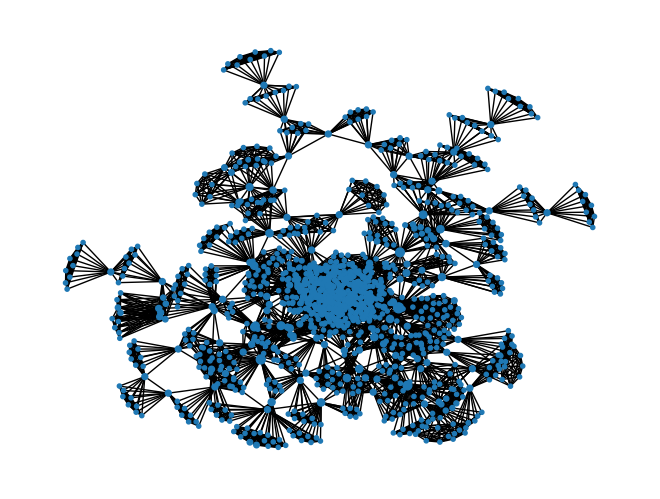

In [3]:
import networkx as nx
import pickle
import re 

def remove_number_dot_space(s):
    re.sub(r'^\d+\.\s*', '', s)

# to get the first x amount of items from the dictionary
def get_first_N_item(d, n):
    items = list(d.items())[:n]
    return dict(items)

# open the dictionary with the cast for each movie
with open("movies_cast_new.pkl", "rb") as fp:
    data = pickle.load(fp)
    
# only take the top 150 movies cast
new_data = get_first_N_item(data, 150)

# save the 150 movie titles
movie_titles = list(new_data.keys())

# create an empty graph
G = nx.Graph()
temp_names = new_data.values()
all_names = []

# we take the top cast from each movie, the first 10 actors
top_cast_nr = 10

for i in temp_names:
    if len(i) > top_cast_nr:
        i = i[:top_cast_nr]
    all_names += i

# remove repeated actors
unique_items = set(all_names)

# add unique actors as nodes to the graph
unique_list = list(unique_items)
G.add_nodes_from(unique_list)

data = new_data

actor_dict = {}
keys = data.keys()

for actor in list(G.nodes()):
    movies_list = [movie for movie, actors_list in data.items() if actor in actors_list]
    actor_dict[actor] = movies_list


print(actor_dict)


nx.set_node_attributes(G, actor_dict, 'movies starred in')

print(actor_dict)
for names in new_data.values():
    if len(names) > top_cast_nr:
        names = names[:top_cast_nr]
    
    for i in range(len(names)):
        for j in range(len(names)):
            if names[i] != names[j]:
                G.add_edge(names[i], names[j])
                
                
degrees = dict(G.degree())
all_degrees = [degrees[i] for i in G.nodes()]
#%%
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos, node_size = all_degrees)

## Analysis of the network

## Text and sentiment analysis

justify why we take the wikipedia plot instead of imdb: imdb was shorteR?
basically explain everything in detail why we do it and explain model we use etc

In [4]:
import wikipedia
import pickle

In [5]:
def extract_plot_section(movie_title):
    try:
        # get the wiki page for the movie
        wiki = wikipedia.page(movie_title)

        # find where the "Plot" section starts and ends
        start = wiki.content.find("== Plot ==")
        end = wiki.content.find("== Cast ==")
        
        if start != -1 and end != -1:
            # return the "Plot" section
            plot_section = wiki.content[start + len("== Plot =="):end].strip()
            return plot_section
        else:
            return "Plot section not found for this movie."

    except wikipedia.exceptions.DisambiguationError as e:
        return f"Disambiguation error: {e}"
    except wikipedia.exceptions.HTTPTimeoutError:
        return "HTTP timeout error. Please try again later."
    except wikipedia.exceptions.PageError:
        return f"Page not found for {movie_title}."
    except Exception as e:
        return f"An error occurred: {str(e)}"

In [6]:
# this is an example to use the function
movie_title = "The Shawshank Redemption"
plot_summary = extract_plot_section(movie_title)
print(plot_summary)

In early 1947, Portland, Maine, banker Andy Dufresne arrives at Shawshank State Prison to serve two consecutive life sentences for murdering his wife and her lover. He is befriended by Ellis "Red" Redding, a contraband smuggler serving a life sentence, who procures a rock hammer and a large poster of Rita Hayworth for Andy. Assigned to work in the prison laundry, Andy is frequently sexually assaulted by prison gang "the Sisters" and their leader, Bogs Diamond.
In 1949, Andy overhears the captain of the guards, Byron Hadley, complaining about being taxed on an inheritance and offers to help him shelter the money legally. After an assault by the Sisters nearly kills Andy, Hadley beats and cripples Bogs, who is subsequently transferred to another prison; Andy is not attacked again. Warden Samuel Norton meets Andy and reassigns him to the prison library to assist elderly inmate Brooks Hatlen, a front to use Andy's financial expertise to manage financial matters for other prison staff, guar

In [7]:
with open("movies_cast_new.pkl", "rb") as fp:
    data = pickle.load(fp)

In [8]:
print(data)

{'The Shawshank Redemption': ['Tim Robbins', 'Morgan Freeman', 'Bob Gunton', 'William Sadler', 'Clancy Brown', 'Gil Bellows', 'Mark Rolston', 'James Whitmore', 'Jeffrey DeMunn', 'Larry Brandenburg', 'Neil Giuntoli', 'Brian Libby', 'David Proval', 'Joseph Ragno', 'Jude Ciccolella', 'Paul McCrane', 'Renee Blaine', 'Scott Mann', 'John Horton', 'Gordon Greene', 'Alfonso Freeman', 'Vincent Foster', 'John E. Summers', 'Frank Medrano', 'Mack Miles', 'Alan R. Kessler', 'Morgan Lund', 'Cornell Wallace', 'Gary Lee Davis', 'Neil Summers', 'Ned Bellamy', 'Joe Pecoraro', 'Harold E. Cope Jr.', 'Brian Delate', 'Don McManus', 'Donald Zinn', 'Dorothy Silver', 'Robert Haley', 'Dana Snyder', 'John D. Craig', 'Ken Magee', 'Eugene C. DePasquale', 'Bill Bolender', 'Ron Newell', 'John R. Woodward', 'Chuck Brauchler', 'Dion Anderson', 'Claire Slemmer', 'James Kisicki', 'Rohn Thomas', 'Charlie Kearns', 'Rob Reider', 'Brian Brophy', 'Paul Kennedy', 'James Babson', 'Dennis Baker', 'Fred Culbertson', 'Richard Doo

In [9]:
# new dictionary to store movie titles and their plot sections
movie_plots = {}

# Iterate through the movie titles in the original dictionary
for movie_title in data:
    # extract the plot section for each movie
    plot_summary = extract_plot_section(movie_title)
    
    # add the movie title and plot summary to the new dictionary
    movie_plots[movie_title] = plot_summary

/usr/local/anaconda3/lib/python3.11/site-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/anaconda3/lib/python3.11/site-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


In [10]:
print(movie_plots)

{'The Shawshank Redemption': 'In early 1947, Portland, Maine, banker Andy Dufresne arrives at Shawshank State Prison to serve two consecutive life sentences for murdering his wife and her lover. He is befriended by Ellis "Red" Redding, a contraband smuggler serving a life sentence, who procures a rock hammer and a large poster of Rita Hayworth for Andy. Assigned to work in the prison laundry, Andy is frequently sexually assaulted by prison gang "the Sisters" and their leader, Bogs Diamond.\nIn 1949, Andy overhears the captain of the guards, Byron Hadley, complaining about being taxed on an inheritance and offers to help him shelter the money legally. After an assault by the Sisters nearly kills Andy, Hadley beats and cripples Bogs, who is subsequently transferred to another prison; Andy is not attacked again. Warden Samuel Norton meets Andy and reassigns him to the prison library to assist elderly inmate Brooks Hatlen, a front to use Andy\'s financial expertise to manage financial matt

In [11]:
# save the movie_plots dictionary to a new file (e.g., "movie_plots.pkl")
with open("movie_plots.pkl", "wb") as fp:
    pickle.dump(movie_plots, fp)